# 01 — Data Exploration (EDA)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')
sns.set_theme(style='whitegrid', palette='muted', font_scale=1.1)
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['figure.dpi'] = 100

DATA_DIR = Path('../data/raw/csv')

# Tüm CSV'leri yükle
csv_files = {
    'patient':        DATA_DIR / 'patient_01.csv',
    'diag_er':        DATA_DIR / 'diagnosis_er_02.csv',
    'diag_hosp':      DATA_DIR / 'diagnosis_hosp_03.csv',
    'vital_signs':    DATA_DIR / 'vital_signs_04.csv',
    'medication':     DATA_DIR / 'medication_05.csv',
    'lab':            DATA_DIR / 'lab_06.csv',
    'atc5':           DATA_DIR / 'atc5.csv',
    'atc7':           DATA_DIR / 'atc7.csv',
    'dicom_metadata': DATA_DIR / 'CDSL-1.0.0-dicom-metadata.csv',
}

dfs = {}
for name, path in csv_files.items():
    print(f'📂 Loading {name} ...')
    dfs[name] = pd.read_csv(path, low_memory=False, encoding='latin-1')
    print(f'   → Shape: {dfs[name].shape}')

print('\n✅ Tüm CSV dosyaları yüklendi.')

📂 Loading patient ...
   → Shape: (4479, 34)
📂 Loading diag_er ...
   → Shape: (4197, 19)
📂 Loading diag_hosp ...
   → Shape: (4427, 66)
📂 Loading vital_signs ...
   → Shape: (224146, 11)
📂 Loading medication ...
   → Shape: (115649, 8)
📂 Loading lab ...
   → Shape: (786984, 10)
📂 Loading atc5 ...
   → Shape: (323, 2)
📂 Loading atc7 ...
   → Shape: (574, 2)
📂 Loading dicom_metadata ...
   → Shape: (1444764, 15)

✅ Tüm CSV dosyaları yüklendi.


---
## 1. Genel Bakış — Tüm CSV'lerin Sütun Yapıları

In [2]:
for name, df in dfs.items():
    print(f'\n{"="*70}')
    print(f'📋 {name.upper()} — {df.shape[0]:,} satır × {df.shape[1]} sütun')
    print(f'{"="*70}')
    print(f'\nSütunlar: {list(df.columns)}')
    print(f'\nVeri Tipleri:')
    print(df.dtypes.to_string())
    print(f'\nEksik Veri Oranları (%):')
    missing = (df.isnull().sum() / len(df) * 100).round(2)
    missing_nonzero = missing[missing > 0]
    if len(missing_nonzero) > 0:
        print(missing_nonzero.sort_values(ascending=False).to_string())
    else:
        print('  → Hiçbir sütunda eksik veri yok.')


📋 PATIENT — 4,479 satır × 34 sütun

Sütunlar: ['patient_id', 'age', 'sex', 'diag_inpat', 'admission_d_inpat', 'icu_date_in', 'icu_date_out', 'icu_days', 'icu_n_ing', 'discharge_date', 'destin_discharge', 'admission_date_emerg', 'time_admission_emerg', 'diag_emerg', 'department_emerg', 'time_constant_first_emerg', 'bp_max_first_emerg', 'bp_min_first_emerg', 'temp_first_emerg', 'hr_first_emerg', 'sat_02_first_emerg', 'glu_first_emerg', 'diuresis_first_emerg', 'time_constant_last_emerg', 'bp_max_last_emerg', 'bp_min_last_emerg', 'temp_last_emerg', 'hr_last_emerg', 'sat_02_last_emerg', 'glu_last_emerg', 'destin_emerg', 'ant_admission_date_in', 'ant_diag_inpat', 'mechvent']

Veri Tipleri:
patient_id                     int64
age                            int64
sex                              str
diag_inpat                       str
admission_d_inpat                str
icu_date_in                      str
icu_date_out                     str
icu_days                     float64
icu_n_ing 

---
## 2. Patient Tablosu — Detaylı Analiz

Bu tablo, **class label** ve **tabular feature** seçimi için en kritik tablodur.

In [3]:
df_pat = dfs['patient'].copy()
print(f'Shape: {df_pat.shape}')
df_pat.head(10)

Shape: (4479, 34)


,patient_id,age,sex,diag_inpat,admission_d_inpat,icu_date_in,icu_date_out,icu_days,icu_n_ing,discharge_date,...,bp_max_last_emerg,bp_min_last_emerg,temp_last_emerg,hr_last_emerg,sat_02_last_emerg,glu_last_emerg,destin_emerg,ant_admission_date_in,ant_diag_inpat,mechvent
0,10030053,83,FEMALE,COVID CONFIRMED,2191-10-11 00:00:00,NaN,NaN,NaN,NaN,2191-10-27 00:00:00,...,121,49,36.1,58,87,0,Admission,NaN,NaN,NaN
1,10037793,75,MALE,COVID CONFIRMED,2101-03-29 00:00:00,NaN,NaN,NaN,NaN,2101-04-06 00:00:00,...,104,74,36.7,111,94,0,Admission,2101-03-15 00:00:00,CORONARY BYPASS,NaN
2,10039757,76,MALE,COVID CONFIRMED,2171-12-22 00:00:00,NaN,NaN,NaN,NaN,2172-01-01 00:00:00,...,0,0,36.9,100,89,0,Admission,NaN,NaN,NaN
3,10070473,84,MALE,COVID CONFIRMED,2193-11-04 00:00:00,NaN,NaN,NaN,NaN,2193-11-06 00:00:00,...,152,81,36.8,80,88,0,Admission,2194-01-20 00:00:00,PNEUMONIA,Yes
4,10082068,74,FEMALE,COVID CONFIRMED,2135-11-21 00:00:00,NaN,NaN,NaN,NaN,2135-12-02 00:00:00,...,0,0,37.0,95,80,0,Admission,NaN,NaN,Yes
5,10090311,53,MALE,COVID CONFIRMED,2121-08-25 00:00:00,NaN,NaN,NaN,NaN,2121-08-28 00:00:00,...,113,79,36.4,102,96,0,Admission,NaN,NaN,NaN
6,10194013,65,MALE,COVID CONFIRMED,2151-11-04 00:00:00,NaN,NaN,NaN,NaN,2151-11-11 00:00:00,...,126,73,36.0,70,95,0,Admission,2152-05-01 00:00:00,Dupuytren's disease,NaN
7,10220102,77,MALE,COVID CONFIRMED,2117-01-18 00:00:00,NaN,NaN,NaN,NaN,2117-01-28 00:00:00,...,159,72,35.0,53,96,0,Home,2117-02-05 00:00:00,CONFIRMED COVID,Yes
8,10220380,48,MALE,COVID CONFIRMED,2193-08-02 00:00:00,NaN,NaN,NaN,NaN,2193-08-06 00:00:00,...,114,74,36.4,89,96,0,Admission,NaN,NaN,NaN
9,10269197,37,FEMALE,COVID CONFIRMED,2159-08-16 00:00:00,NaN,NaN,NaN,NaN,2159-09-04 00:00:00,...,106,59,36.6,119,88,0,Admission,2156-09-27 00:00:00,CESAREAN SECTION,NaN


In [4]:
df_pat.info()

<class 'pandas.DataFrame'>
RangeIndex: 4479 entries, 0 to 4478
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   patient_id                 4479 non-null   int64  
 1   age                        4479 non-null   int64  
 2   sex                        4479 non-null   str    
 3   diag_inpat                 4479 non-null   str    
 4   admission_d_inpat          4479 non-null   str    
 5   icu_date_in                398 non-null    str    
 6   icu_date_out               398 non-null    str    
 7   icu_days                   398 non-null    float64
 8   icu_n_ing                  398 non-null    float64
 9   discharge_date             4479 non-null   str    
 10  destin_discharge           4320 non-null   str    
 11  admission_date_emerg       4287 non-null   str    
 12  time_admission_emerg       4287 non-null   str    
 13  diag_emerg                 4287 non-null   str    
 14  dep

In [5]:
df_pat.describe(include='all')

,patient_id,age,sex,diag_inpat,admission_d_inpat,icu_date_in,icu_date_out,icu_days,icu_n_ing,discharge_date,...,bp_max_last_emerg,bp_min_last_emerg,temp_last_emerg,hr_last_emerg,sat_02_last_emerg,glu_last_emerg,destin_emerg,ant_admission_date_in,ant_diag_inpat,mechvent
count,4.479000e+03,4479.000000,4479,4479,4479,398,398,398.000000,398.000000,4479,...,4479.000000,4479.000000,4479.000000,4479.000000,4479.000000,4479.000000,4287,1873,1873,2334
unique,NaN,NaN,2,2,4201,398,398,NaN,NaN,4175,...,NaN,NaN,NaN,NaN,NaN,NaN,7,1817,395,1
top,NaN,NaN,MALE,COVID CONFIRMED,2125-02-24 00:00:00,2136-04-09 17:08:40.317,2136-05-06 14:12:30.2,NaN,NaN,2133-11-17 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,Admission,2117-07-23 00:00:00,CONFIRMED COVID,Yes
freq,NaN,NaN,2636,3943,3,1,1,NaN,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,4271,3,162,2334
mean,5.519153e+07,67.113195,NaN,NaN,NaN,NaN,NaN,13.628141,1.680905,NaN,...,94.961599,55.029248,29.874727,74.919402,78.152266,2.326635,NaN,NaN,NaN,NaN
std,2.593703e+07,17.235474,NaN,NaN,NaN,NaN,NaN,15.755928,1.050938,NaN,...,62.542137,40.248866,14.379774,36.891019,34.461389,24.216536,NaN,NaN,NaN,NaN
min,1.003005e+07,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,3.329897e+07,56.000000,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN,...,0.000000,0.000000,35.800000,70.000000,88.000000,0.000000,NaN,NaN,NaN,NaN
50%,5.518242e+07,69.000000,NaN,NaN,NaN,NaN,NaN,8.000000,1.000000,NaN,...,120.000000,70.000000,36.400000,85.000000,94.000000,0.000000,NaN,NaN,NaN,NaN
75%,7.780860e+07,80.000000,NaN,NaN,NaN,NaN,NaN,20.000000,2.000000,NaN,...,140.000000,81.000000,36.900000,98.000000,96.000000,0.000000,NaN,NaN,NaN,NaN


### 2.1 Potansiyel Class Label Adayları

In [6]:
# Tanı dağılımı (diag_inpat)
print('=== diag_inpat (Yatış Tanısı) Dağılımı ===')
diag_counts = df_pat['diag_inpat'].value_counts()
print(diag_counts)
print(f'\nBenzersiz tanı sayısı: {df_pat["diag_inpat"].nunique()}')

=== diag_inpat (Yatış Tanısı) Dağılımı ===
diag_inpat
COVID CONFIRMED    3943
COVID SUSPECTED     536
Name: count, dtype: int64

Benzersiz tanı sayısı: 2


In [7]:
# Taburcu durumu (destin_discharge)
print('=== destin_discharge (Taburcu Yeri) Dağılımı ===')
discharge_counts = df_pat['destin_discharge'].value_counts()
print(discharge_counts)

=== destin_discharge (Taburcu Yeri) Dağılımı ===
destin_discharge
Home                                   3490
Death                                   550
Transfer to Hospital                    181
Transfer to a Socio-Sanitary Center      74
Voluntary Discharge                      24
Absconded                                 1
Name: count, dtype: int64


In [8]:
# Acil servis çıkış durumu (destin_emerg)
print('=== destin_emerg (Acil Servis Çıkış Yeri) Dağılımı ===')
emerg_counts = df_pat['destin_emerg'].value_counts()
print(emerg_counts)

=== destin_emerg (Acil Servis Çıkış Yeri) Dağılımı ===
destin_emerg
Admission                                   4271
Home                                           6
Transfer to other hospitals                    4
Transfer to other HM group hospital            3
Voluntary discharge for personal reasons       1
Voluntary discharge due to lack of beds        1
Voluntary discharge                            1
Name: count, dtype: int64


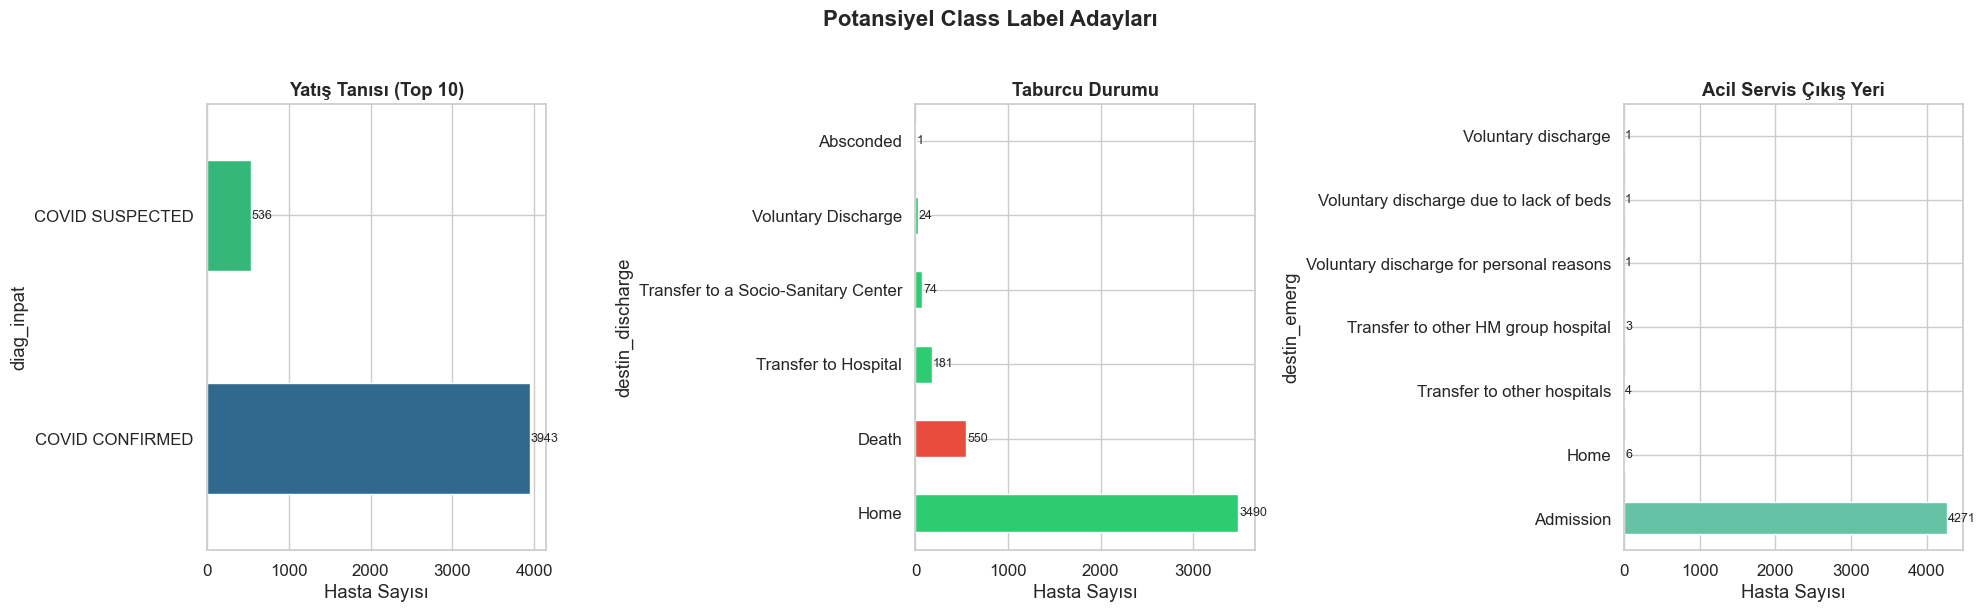

In [9]:
# Görselleştirme: Class label adayları
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 1) diag_inpat
ax = axes[0]
diag_top = df_pat['diag_inpat'].value_counts().head(10)
colors = sns.color_palette('viridis', len(diag_top))
diag_top.plot(kind='barh', ax=ax, color=colors)
ax.set_title('Yatış Tanısı (Top 10)', fontweight='bold')
ax.set_xlabel('Hasta Sayısı')
for i, v in enumerate(diag_top.values):
    ax.text(v + 10, i, str(v), va='center', fontsize=9)

# 2) destin_discharge
ax = axes[1]
colors2 = ['#2ecc71' if x != 'Death' else '#e74c3c' for x in discharge_counts.index]
discharge_counts.plot(kind='barh', ax=ax, color=colors2)
ax.set_title('Taburcu Durumu', fontweight='bold')
ax.set_xlabel('Hasta Sayısı')
for i, v in enumerate(discharge_counts.values):
    ax.text(v + 10, i, str(v), va='center', fontsize=9)

# 3) destin_emerg
ax = axes[2]
colors3 = sns.color_palette('Set2', len(emerg_counts))
emerg_counts.plot(kind='barh', ax=ax, color=colors3)
ax.set_title('Acil Servis Çıkış Yeri', fontweight='bold')
ax.set_xlabel('Hasta Sayısı')
for i, v in enumerate(emerg_counts.values):
    ax.text(v + 10, i, str(v), va='center', fontsize=9)

plt.suptitle('Potansiyel Class Label Adayları', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### 2.2 Demografik Dağılımlar

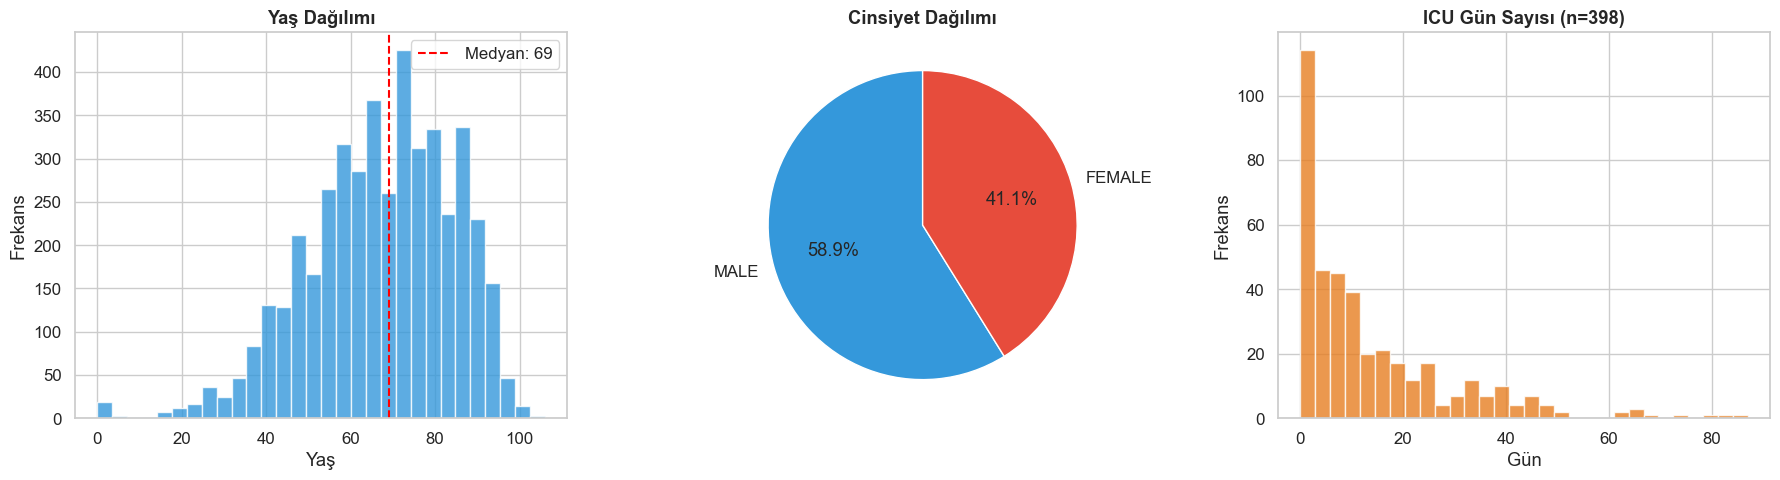

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Yaş dağılımı
ax = axes[0]
df_pat['age'].hist(bins=30, ax=ax, color='#3498db', edgecolor='white', alpha=0.8)
ax.axvline(df_pat['age'].median(), color='red', linestyle='--', label=f'Medyan: {df_pat["age"].median():.0f}')
ax.set_title('Yaş Dağılımı', fontweight='bold')
ax.set_xlabel('Yaş')
ax.set_ylabel('Frekans')
ax.legend()

# Cinsiyet dağılımı
ax = axes[1]
sex_counts = df_pat['sex'].value_counts()
sex_counts.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90,
                colors=['#3498db', '#e74c3c', '#95a5a6'])
ax.set_title('Cinsiyet Dağılımı', fontweight='bold')
ax.set_ylabel('')

# ICU days dağılımı
ax = axes[2]
icu_data = df_pat['icu_days'].dropna()
if len(icu_data) > 0:
    icu_data.hist(bins=30, ax=ax, color='#e67e22', edgecolor='white', alpha=0.8)
    ax.set_title(f'ICU Gün Sayısı (n={len(icu_data)})', fontweight='bold')
    ax.set_xlabel('Gün')
    ax.set_ylabel('Frekans')
else:
    ax.text(0.5, 0.5, 'Veri yok', ha='center', va='center', fontsize=14)
    ax.set_title('ICU Gün Sayısı', fontweight='bold')

plt.tight_layout()
plt.show()

In [11]:
# Mechvent (Mekanik Ventilasyon) dağılımı
print('=== mechvent (Mekanik Ventilasyon) Dağılımı ===')
print(df_pat['mechvent'].value_counts(dropna=False))
print(f'\nEksik oran: {df_pat["mechvent"].isnull().mean()*100:.1f}%')

=== mechvent (Mekanik Ventilasyon) Dağılımı ===
mechvent
Yes    2334
NaN    2145
Name: count, dtype: int64

Eksik oran: 47.9%


### 2.3 Acil Servis İlk & Son Vital Değerleri (Patient tablosundaki)

In [12]:
# İlk acil servis vitalleri
vitals_first = ['bp_max_first_emerg', 'bp_min_first_emerg', 'temp_first_emerg',
                'hr_first_emerg', 'sat_02_first_emerg', 'glu_first_emerg']
vitals_last  = ['bp_max_last_emerg', 'bp_min_last_emerg', 'temp_last_emerg',
                'hr_last_emerg', 'sat_02_last_emerg', 'glu_last_emerg']

print('=== İlk Acil Servis Vitalleri İstatistikleri ===')
display(df_pat[vitals_first].describe().round(2))

print('\n=== Son Acil Servis Vitalleri İstatistikleri ===')
display(df_pat[vitals_last].describe().round(2))

=== İlk Acil Servis Vitalleri İstatistikleri ===


,bp_max_first_emerg,bp_min_first_emerg,temp_first_emerg,hr_first_emerg,sat_02_first_emerg,glu_first_emerg
count,4479.00,4479.00,4479.00,4479.00,4479.00,4479.00
mean,89.20,51.79,28.55,70.70,73.51,2.05
std,64.89,42.93,15.24,39.66,38.27,22.18
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,35.50,63.00,82.00,0.00
50%,118.00,68.00,36.30,83.00,93.00,0.00
75%,140.00,80.00,36.80,97.00,96.00,0.00
max,230.00,845.00,40.10,224.00,99.00,502.00



=== Son Acil Servis Vitalleri İstatistikleri ===


,bp_max_last_emerg,bp_min_last_emerg,temp_last_emerg,hr_last_emerg,sat_02_last_emerg,glu_last_emerg
count,4479.00,4479.00,4479.00,4479.00,4479.00,4479.00
mean,94.96,55.03,29.87,74.92,78.15,2.33
std,62.54,40.25,14.38,36.89,34.46,24.22
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,35.80,70.00,88.00,0.00
50%,120.00,70.00,36.40,85.00,94.00,0.00
75%,140.00,81.00,36.90,98.00,96.00,0.00
max,230.00,845.00,96.00,224.00,99.00,505.00


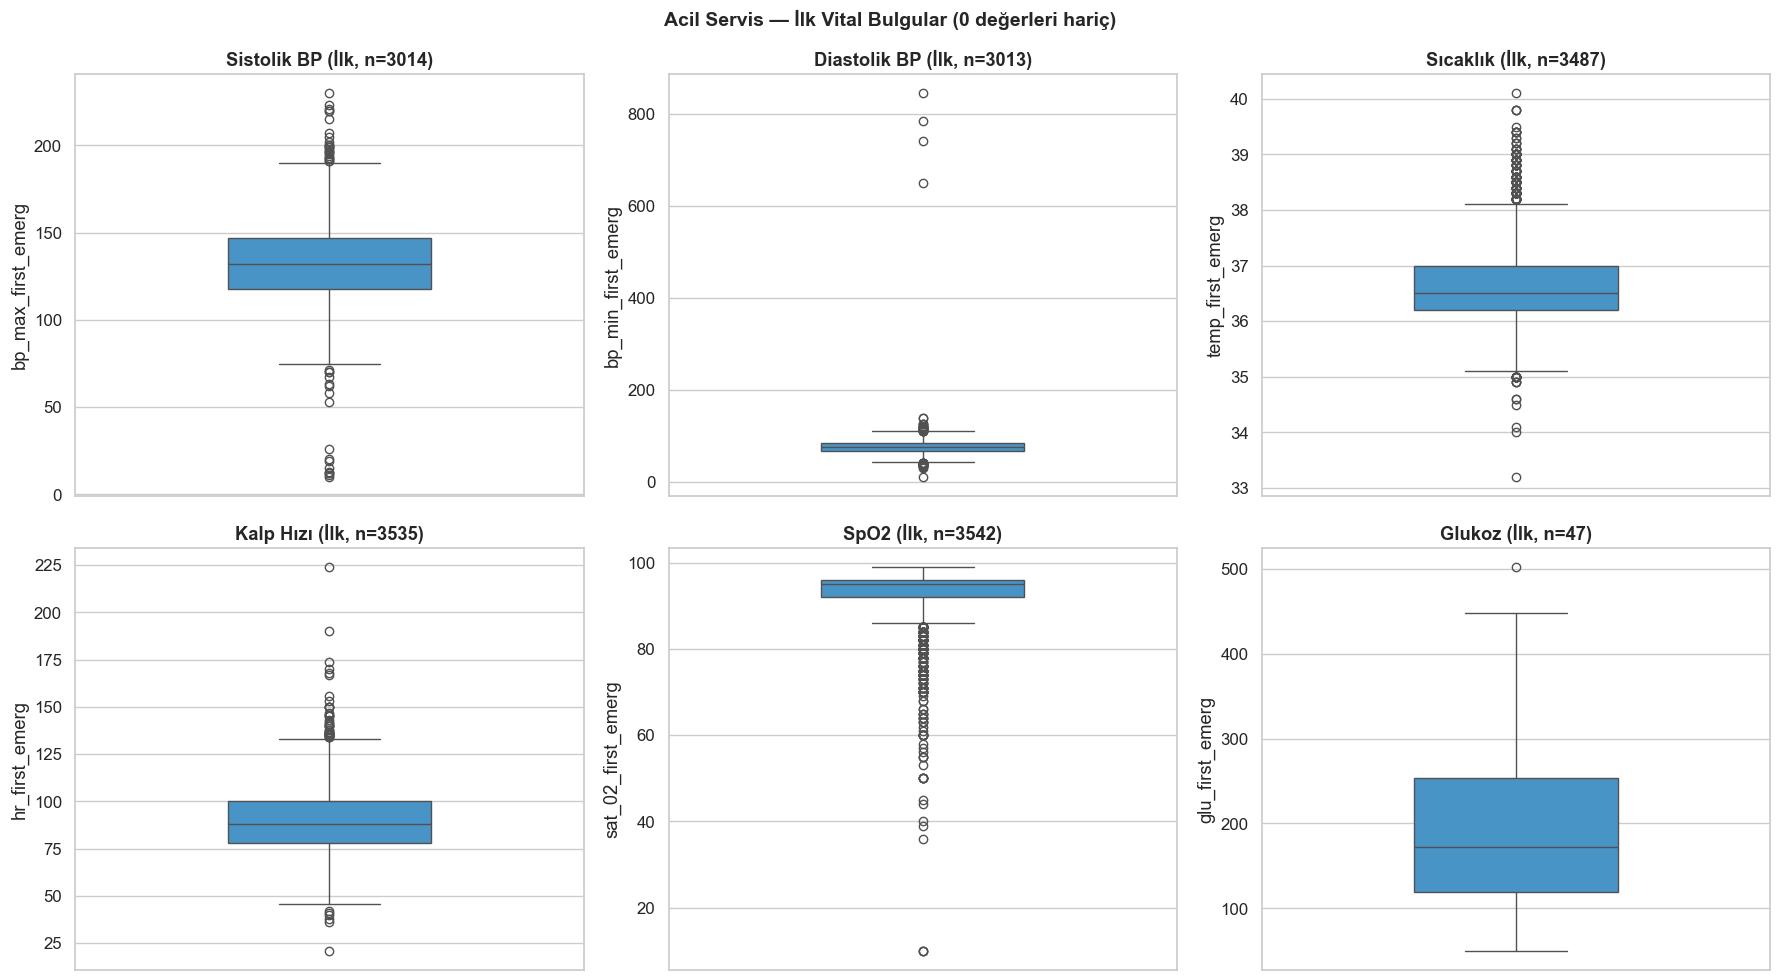

In [13]:
# İlk vitaller box plot
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
vital_labels = ['Sistolik BP', 'Diastolik BP', 'Sıcaklık', 'Kalp Hızı', 'SpO2', 'Glukoz']

for i, (col, label) in enumerate(zip(vitals_first, vital_labels)):
    ax = axes[i // 3][i % 3]
    data = df_pat[col].replace(0, pd.NA).dropna()
    if len(data) > 0:
        sns.boxplot(y=data, ax=ax, color='#3498db', width=0.4)
        ax.set_title(f'{label} (İlk, n={len(data)})', fontweight='bold')
    else:
        ax.set_title(f'{label} (Veri yok)')

plt.suptitle('Acil Servis — İlk Vital Bulgular (0 değerleri hariç)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 2.4 Patient Tablosu — Eksik Veri Haritası

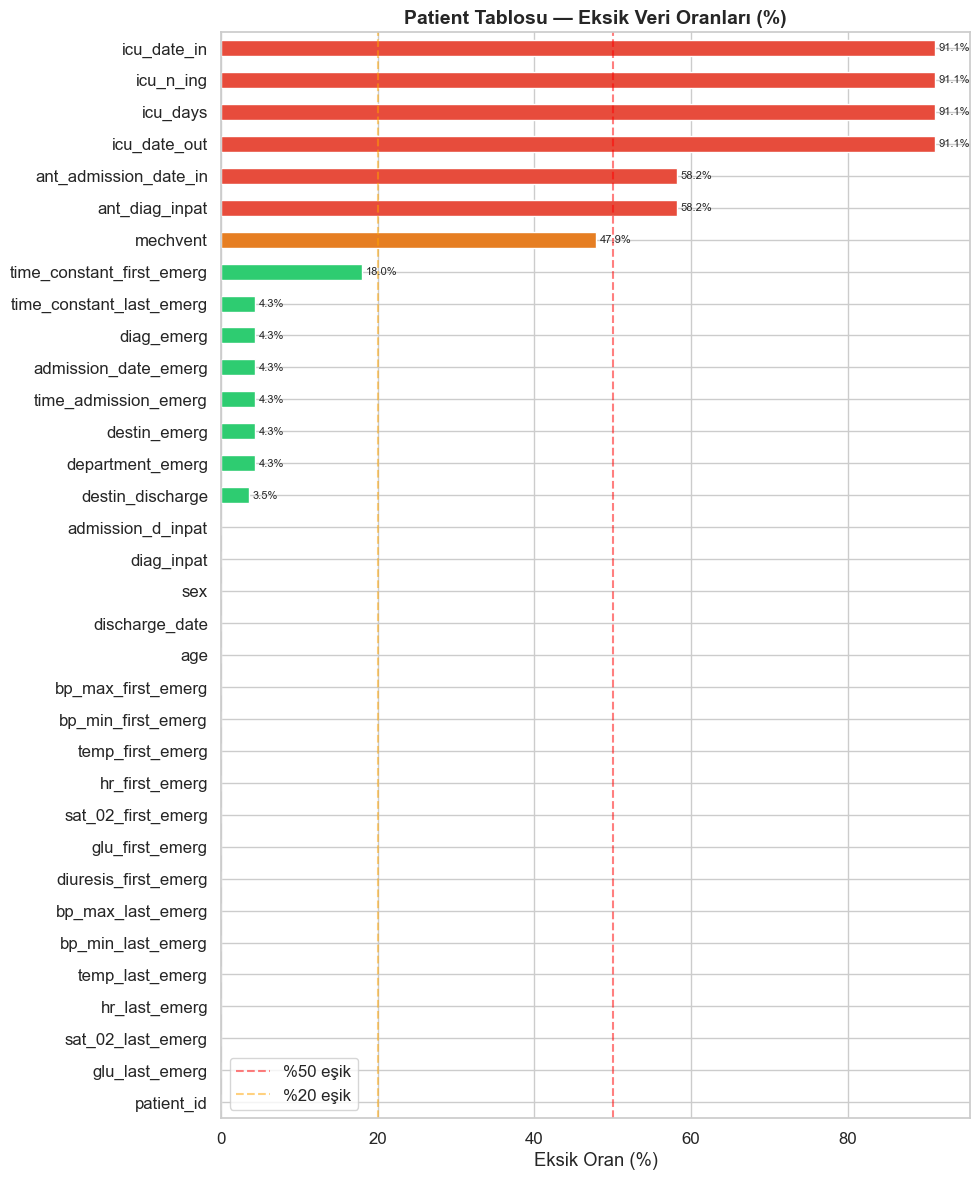

In [14]:
# Patient tablosu eksik veri haritası
patient_missing = (df_pat.isnull().sum() / len(df_pat) * 100).sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(10, 12))
colors = ['#e74c3c' if v > 50 else '#e67e22' if v > 20 else '#2ecc71' for v in patient_missing.values]
patient_missing.plot(kind='barh', ax=ax, color=colors)
ax.set_title('Patient Tablosu — Eksik Veri Oranları (%)', fontsize=14, fontweight='bold')
ax.set_xlabel('Eksik Oran (%)')
ax.axvline(x=50, color='red', linestyle='--', alpha=0.5, label='%50 eşik')
ax.axvline(x=20, color='orange', linestyle='--', alpha=0.5, label='%20 eşik')
ax.legend()

for i, v in enumerate(patient_missing.values):
    if v > 0:
        ax.text(v + 0.5, i, f'{v:.1f}%', va='center', fontsize=8)

plt.tight_layout()
plt.show()

---
## 3. Tanı Tabloları (Diagnosis)

In [15]:
# Acil Servis Tanıları
df_diag_er = dfs['diag_er']
print(f'Shape: {df_diag_er.shape}')
print(f'\nSütunlar: {list(df_diag_er.columns)}')
print(f'\nBenzersiz hasta: {df_diag_er["patient_id"].nunique()}')
print(f'\n--- İlk 5 Satır ---')
display(df_diag_er.head())

Shape: (4197, 19)

Sütunlar: ['diagnosis_er_adm_id', 'patient_id', 'dia_ppal', 'dia_02', 'dia_03', 'dia_04', 'dia_05', 'dia_06', 'dia_07', 'dia_08', 'dia_09', 'dia_10', 'dia_11', 'dia_12', 'proc_01', 'proc_02', 'proc_03', 'proc_04', 'proc_05']

Benzersiz hasta: 4197

--- İlk 5 Satır ---


,diagnosis_er_adm_id,patient_id,dia_ppal,dia_02,dia_03,dia_04,dia_05,dia_06,dia_07,dia_08,dia_09,dia_10,dia_11,dia_12,proc_01,proc_02,proc_03,proc_04,proc_05
0,1,10030053,J18.9,I50.9,J96.90,J90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,10037793,R07.9,B34.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BW03ZZZ,4A02X4Z,NaN,NaN,NaN
2,3,10039757,J18.9,J96.91,R68.89,J80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BW24ZZZ,NaN,NaN,NaN,NaN
3,4,10070473,J98.8,J96.90,R68.89,J18.9,J96.91,Z20.828,NaN,NaN,NaN,NaN,NaN,NaN,3E0F7SF,BW03ZZZ,NaN,NaN,NaN
4,5,10082068,J18.9,R68.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4A033R1,NaN,NaN,NaN,NaN


=== ER Ana Tanı (dia_ppal) Top 15 ===
dia_ppal
U07.1      560
J12.89     497
J18.9      493
R68.89     391
J98.8      325
B97.29     240
Z20.828    183
B34.2      114
J96.90     112
B99.9       80
J84.9       62
J96.91      49
R50.9       46
J12.81      38
J22         36
Name: count, dtype: int64


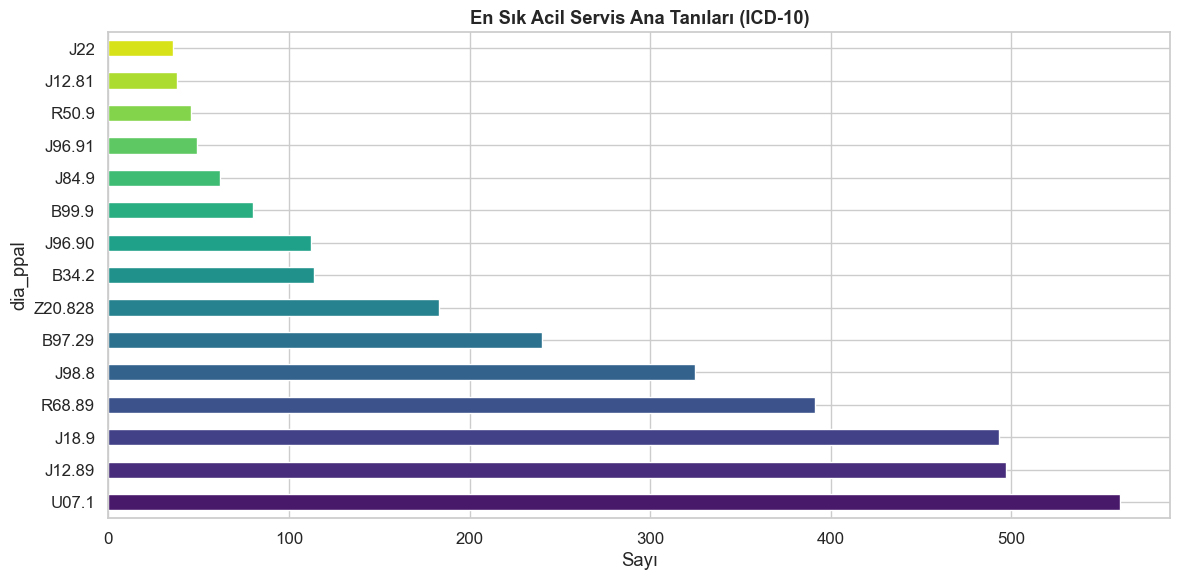

In [16]:
# ER tanı: en sık ana tanılar (dia_ppal)
print('=== ER Ana Tanı (dia_ppal) Top 15 ===')
er_diag_top = df_diag_er['dia_ppal'].value_counts().head(15)
print(er_diag_top)

fig, ax = plt.subplots(figsize=(12, 6))
er_diag_top.plot(kind='barh', ax=ax, color=sns.color_palette('viridis', len(er_diag_top)))
ax.set_title('En Sık Acil Servis Ana Tanıları (ICD-10)', fontweight='bold')
ax.set_xlabel('Sayı')
plt.tight_layout()
plt.show()

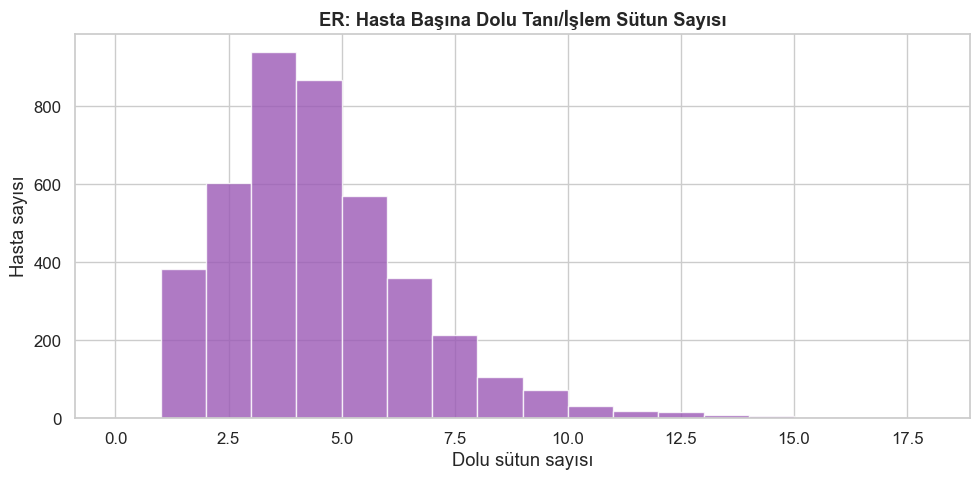

In [17]:
# Eksik tanı sayıları (kaç hastada kaç tanı dolu?)
diag_cols_er = [c for c in df_diag_er.columns if c.startswith('dia_') or c.startswith('proc_')]
er_filled = df_diag_er[diag_cols_er].notna().sum(axis=1)

fig, ax = plt.subplots(figsize=(10, 5))
er_filled.hist(bins=range(0, len(diag_cols_er)+2), ax=ax, color='#9b59b6', edgecolor='white', alpha=0.8)
ax.set_title('ER: Hasta Başına Dolu Tanı/İşlem Sütun Sayısı', fontweight='bold')
ax.set_xlabel('Dolu sütun sayısı')
ax.set_ylabel('Hasta sayısı')
plt.tight_layout()
plt.show()

In [18]:
# Hastane Tanıları
df_diag_hosp = dfs['diag_hosp']
print(f'Shape: {df_diag_hosp.shape}')
print(f'\nSütunlar: {list(df_diag_hosp.columns)}')
print(f'\nBenzersiz hasta: {df_diag_hosp["patient_id"].nunique()}')
print(f'\n--- İlk 5 Satır ---')
display(df_diag_hosp.head())

Shape: (4427, 66)

Sütunlar: ['diagnosis_hosp_adm_id', 'patient_id', 'dia_ppal', 'poad_ppal', 'dia_02', 'poad_02', 'dia_03', 'poad_03', 'dia_04', 'poad_04', 'dia_05', 'poad_05', 'dia_06', 'poad_06', 'dia_07', 'poad_07', 'dia_08', 'poad_08', 'dia_09', 'poad_09', 'dia_10', 'poad_10', 'dia_11', 'poad_11', 'dia_12', 'poad_12', 'dia_13', 'poad_13', 'dia_14', 'poad_14', 'dia_15', 'poad_15', 'dia_16', 'poad_16', 'dia_17', 'poad_17', 'dia_18', 'poad_18', 'dia_19', 'poad_19', 'proc_01', 'proc_02', 'proc_03', 'proc_04', 'proc_05', 'proc_06', 'proc_07', 'proc_08', 'proc_09', 'proc_10', 'proc_11', 'proc_12', 'proc_13', 'proc_14', 'proc_15', 'proc_16', 'proc_17', 'proc_18', 'proc_19', 'proc_20', 'neo_01', 'neo_02', 'neo_03', 'neo_04', 'neo_05', 'neo_06']

Benzersiz hasta: 4427

--- İlk 5 Satır ---


,diagnosis_hosp_adm_id,patient_id,dia_ppal,poad_ppal,dia_02,poad_02,dia_03,poad_03,dia_04,poad_04,...,proc_17,proc_18,proc_19,proc_20,neo_01,neo_02,neo_03,neo_04,neo_05,neo_06
0,1,10030053,J12.89,Y,B97.29,Y,J96.01,Y,J96.02,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,10037793,J12.89,Y,J96.90,N,B97.29,Y,I10,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,10039757,J12.89,Y,B97.29,Y,J96.00,Y,R19.7,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,10070473,J44.0,Y,J18.9,Y,J44.1,Y,J96.01,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,10082068,J12.9,Y,J96.00,Y,R68.89,Y,I10,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


=== Hospital Ana Tanı (dia_ppal) Top 15 ===
dia_ppal
J12.89    1596
U07.1     1499
J18.9      337
J98.8      211
J44.0       68
J84.9       48
J22         33
N39.0       28
J43.9       25
J47.0       24
I26.99      21
R91.8       18
J12.81      17
J44.1       16
I11.0       14
Name: count, dtype: int64


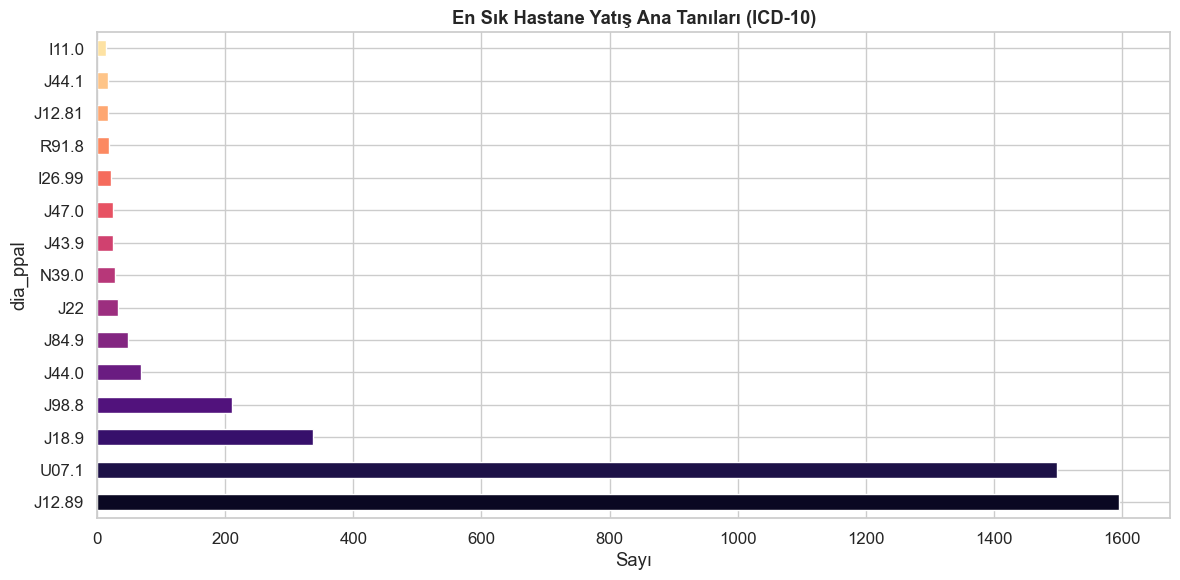

In [19]:
# Hospital tanı: en sık ana tanılar
print('=== Hospital Ana Tanı (dia_ppal) Top 15 ===')
hosp_diag_top = df_diag_hosp['dia_ppal'].value_counts().head(15)
print(hosp_diag_top)

fig, ax = plt.subplots(figsize=(12, 6))
hosp_diag_top.plot(kind='barh', ax=ax, color=sns.color_palette('magma', len(hosp_diag_top)))
ax.set_title('En Sık Hastane Yatış Ana Tanıları (ICD-10)', fontweight='bold')
ax.set_xlabel('Sayı')
plt.tight_layout()
plt.show()

In [20]:
# Eksik veri karşılaştırması
print('=== Diagnosis ER — Eksik Veri ===')
er_miss = (df_diag_er.isnull().sum() / len(df_diag_er) * 100).round(1)
print(er_miss[er_miss > 0].sort_values(ascending=False).head(20))

print('\n=== Diagnosis Hosp — Eksik Veri ===')
hosp_miss = (df_diag_hosp.isnull().sum() / len(df_diag_hosp) * 100).round(1)
print(hosp_miss[hosp_miss > 0].sort_values(ascending=False).head(20))

=== Diagnosis ER — Eksik Veri ===
proc_05    99.9
dia_12     99.7
dia_11     99.5
proc_04    99.5
dia_10     99.1
dia_09     98.7
proc_03    97.9
dia_08     97.5
dia_07     95.6
dia_06     91.8
dia_05     84.3
proc_02    78.8
dia_04     70.2
dia_03     42.5
proc_01    32.8
dia_02     11.5
dtype: float64

=== Diagnosis Hosp — Eksik Veri ===
neo_06     100.0
neo_05     100.0
neo_04      99.9
neo_03      99.7
proc_20     97.9
neo_02      97.7
proc_19     97.5
proc_18     97.1
proc_17     96.6
proc_16     95.5
proc_15     94.3
poad_19     93.3
dia_19      93.3
proc_14     92.9
neo_01      91.9
poad_18     91.8
dia_18      91.8
proc_13     90.5
poad_17     89.9
dia_17      89.9
dtype: float64


---
## 4. Vital Signs Tablosu

In [21]:
df_vital = dfs['vital_signs']
print(f'Shape: {df_vital.shape}')
print(f'Sütunlar: {list(df_vital.columns)}')
print(f'Benzersiz hasta: {df_vital["patient_id"].nunique()}')
print(f'Hasta başına ortalama kayıt: {df_vital.shape[0] / df_vital["patient_id"].nunique():.1f}')
display(df_vital.head())

Shape: (224146, 11)
Sütunlar: ['vital_sign_id', 'patient_id', 'constants_ing_date', 'constants_ing_time', 'bp_max_ing', 'bp_min_ing', 'temp_ing', 'hr_ing', 'sat_02_ing', 'sat_02_ing_obs', 'glu_ing']
Benzersiz hasta: 4377
Hasta başına ortalama kayıt: 51.2


,vital_sign_id,patient_id,constants_ing_date,constants_ing_time,bp_max_ing,bp_min_ing,temp_ing,hr_ing,sat_02_ing,sat_02_ing_obs,glu_ing
0,1,10030053,2191-10-23 00:00:00,23:01:00,0,0,36.2,0,0,...,0
1,2,10030053,2191-10-24 00:00:00,17:00:00,143,79,35.5,64,0,...,0
2,3,10030053,2191-10-25 00:00:00,18:32:00,113,41,36.3,73,0,...,0
3,4,10030053,2191-10-26 00:00:00,02:44:00,0,0,35.5,0,0,...,0
4,5,10030053,2191-10-23 00:00:00,10:52:00,104,52,37.4,83,0,...,0


In [22]:
df_vital.describe().round(2)

,vital_sign_id,patient_id,bp_max_ing,bp_min_ing,temp_ing,hr_ing,sat_02_ing,glu_ing
count,224146.00,224146.00,224146.00,224146.00,224146.00,224146.00,224146.00,224146.0
mean,112073.50,55403937.59,33.49,19.25,18.08,29.87,46.46,0.0
std,64705.52,25757508.33,55.79,32.17,18.13,38.51,51.88,0.0
min,1.00,10030053.00,0.00,0.00,0.00,0.00,0.00,0.0
25%,56037.25,33893942.00,0.00,0.00,0.00,0.00,0.00,0.0
50%,112073.50,55355884.00,0.00,0.00,0.00,0.00,0.00,0.0
75%,168109.75,77280070.00,99.00,54.00,36.20,70.00,95.00,0.0
max,224146.00,99994693.00,225.00,178.00,40.50,914.00,9797.00,0.0


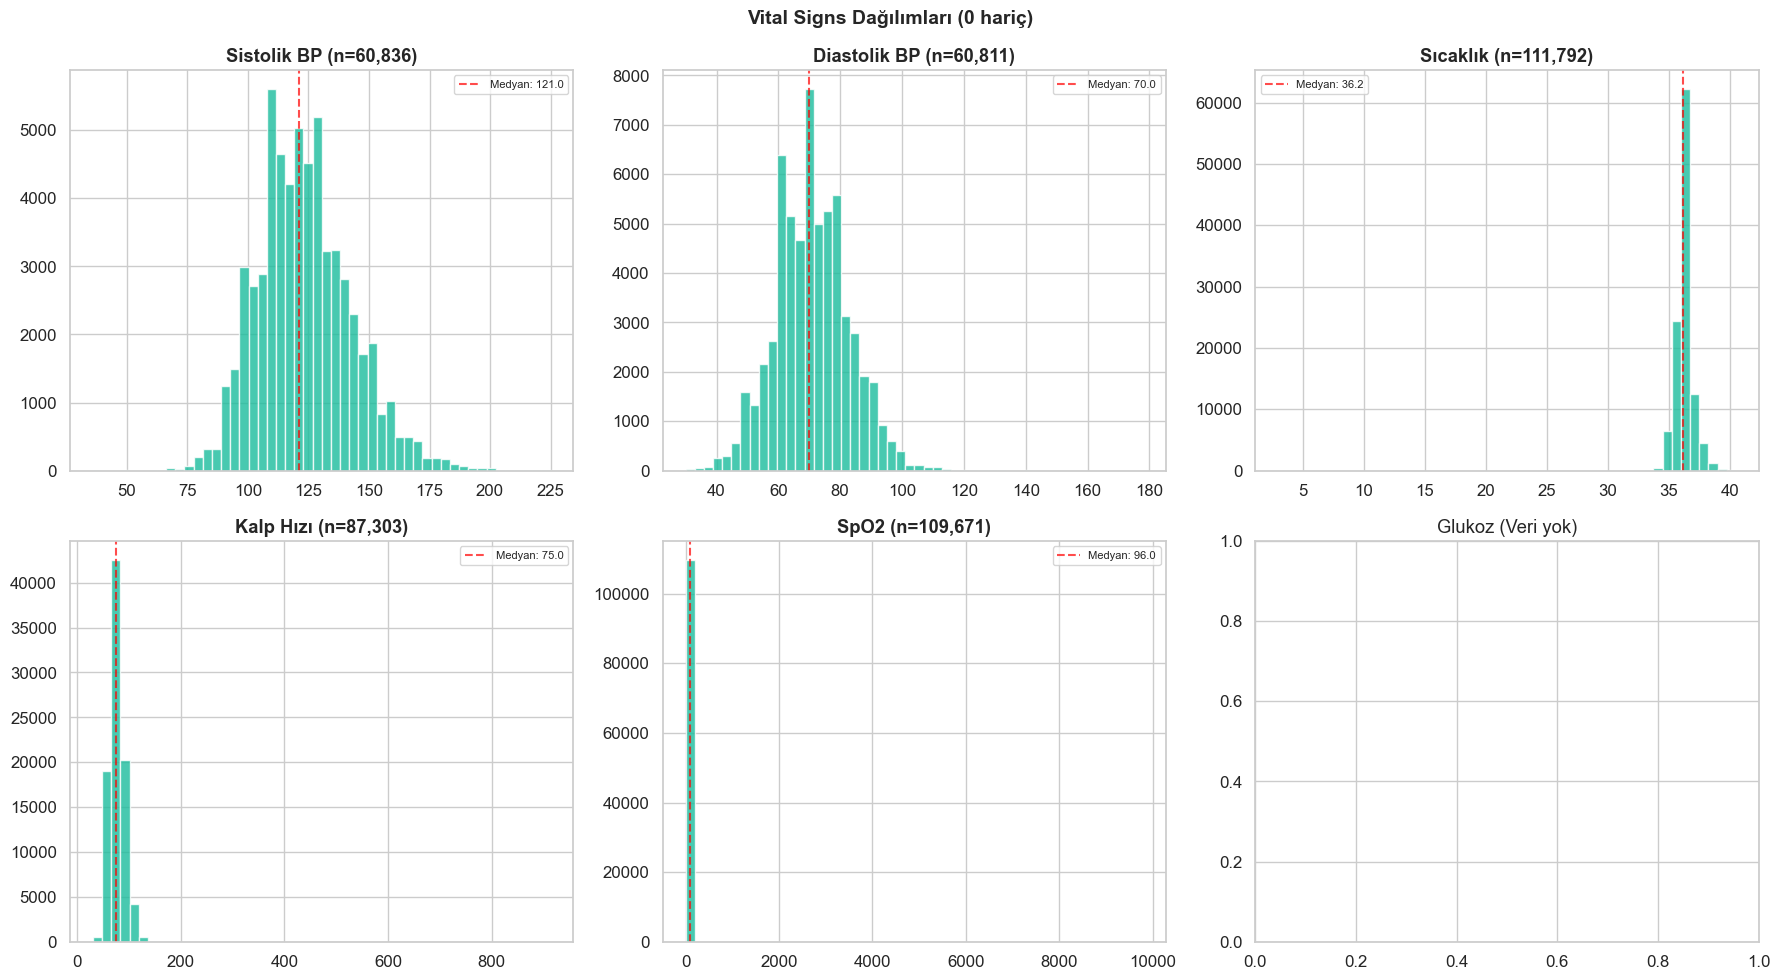

In [23]:
# Vital sign dağılımları (0 değerleri hariç)
vital_cols = ['bp_max_ing', 'bp_min_ing', 'temp_ing', 'hr_ing', 'sat_02_ing', 'glu_ing']
vital_labels = ['Sistolik BP', 'Diastolik BP', 'Sıcaklık', 'Kalp Hızı', 'SpO2', 'Glukoz']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, (col, label) in enumerate(zip(vital_cols, vital_labels)):
    ax = axes[i // 3][i % 3]
    data = df_vital[col].replace(0, pd.NA).dropna()
    if len(data) > 0:
        data.hist(bins=50, ax=ax, color='#1abc9c', edgecolor='white', alpha=0.8)
        ax.axvline(data.median(), color='red', linestyle='--', alpha=0.7,
                   label=f'Medyan: {data.median():.1f}')
        ax.set_title(f'{label} (n={len(data):,})', fontweight='bold')
        ax.legend(fontsize=8)
    else:
        ax.set_title(f'{label} (Veri yok)')

plt.suptitle('Vital Signs Dağılımları (0 hariç)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

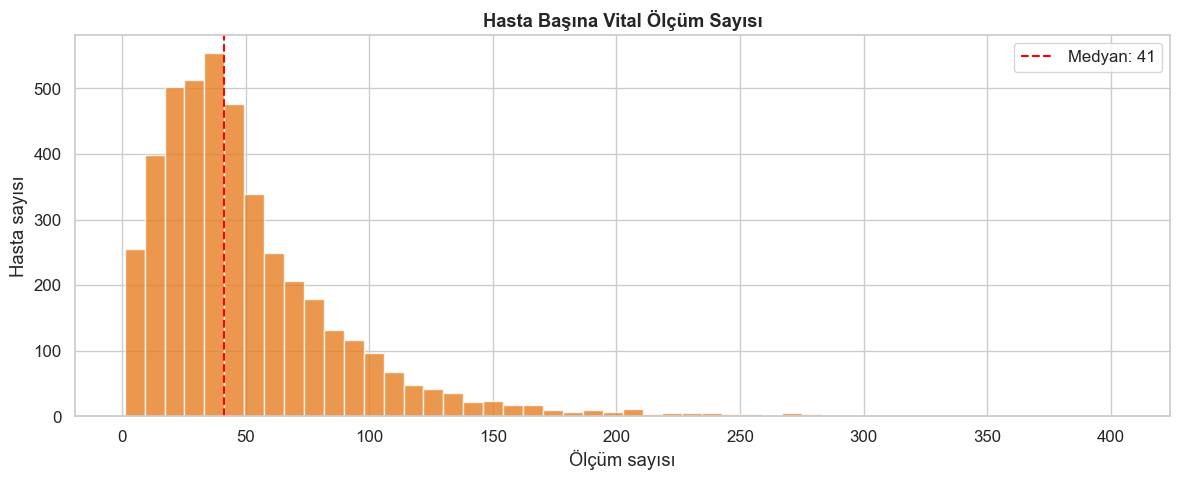

Min: 1, Max: 404, Medyan: 41, Ortalama: 51.2


In [24]:
# Hasta başına vital ölçüm sayısı dağılımı
vital_per_patient = df_vital.groupby('patient_id').size()

fig, ax = plt.subplots(figsize=(12, 5))
vital_per_patient.hist(bins=50, ax=ax, color='#e67e22', edgecolor='white', alpha=0.8)
ax.axvline(vital_per_patient.median(), color='red', linestyle='--',
           label=f'Medyan: {vital_per_patient.median():.0f}')
ax.set_title('Hasta Başına Vital Ölçüm Sayısı', fontweight='bold')
ax.set_xlabel('Ölçüm sayısı')
ax.set_ylabel('Hasta sayısı')
ax.legend()
plt.tight_layout()
plt.show()

print(f'Min: {vital_per_patient.min()}, Max: {vital_per_patient.max()}, '
      f'Medyan: {vital_per_patient.median():.0f}, Ortalama: {vital_per_patient.mean():.1f}')

In [25]:
# Vital signs eksik veri
print('=== Vital Signs — Eksik/Sıfır Oranları ===')
for col in vital_cols:
    null_pct = df_vital[col].isnull().mean() * 100
    zero_pct = (df_vital[col] == 0).mean() * 100
    print(f'{col:20s} → null: {null_pct:5.1f}%  |  sıfır: {zero_pct:5.1f}%  |  toplam boş: {null_pct+zero_pct:5.1f}%')

=== Vital Signs — Eksik/Sıfır Oranları ===
bp_max_ing           → null:   0.0%  |  sıfır:  72.9%  |  toplam boş:  72.9%
bp_min_ing           → null:   0.0%  |  sıfır:  72.9%  |  toplam boş:  72.9%
temp_ing             → null:   0.0%  |  sıfır:  50.1%  |  toplam boş:  50.1%
hr_ing               → null:   0.0%  |  sıfır:  61.1%  |  toplam boş:  61.1%
sat_02_ing           → null:   0.0%  |  sıfır:  51.1%  |  toplam boş:  51.1%
glu_ing              → null:   0.0%  |  sıfır: 100.0%  |  toplam boş: 100.0%


---
## 5. Lab Tablosu

In [26]:
df_lab = dfs['lab']
print(f'Shape: {df_lab.shape}')
print(f'Sütunlar: {list(df_lab.columns)}')
print(f'Benzersiz hasta: {df_lab["patient_id"].nunique()}')
print(f'Hasta başına ortalama test: {df_lab.shape[0] / df_lab["patient_id"].nunique():.1f}')
display(df_lab.head(10))

Shape: (786984, 10)
Sütunlar: ['lab_id', 'patient_id', 'lab_number', 'lab_date', 'time_lab', 'item_lab', 'val_result', 'result_text', 'ud_result', 'ref_values']
Benzersiz hasta: 3540
Hasta başına ortalama test: 222.3


,lab_id,patient_id,lab_number,lab_date,time_lab,item_lab,val_result,result_text,ud_result,ref_values
0,1,10030053,I-12,2191-10-20 00:00:00,00:00:00,D-DIMER -- D-dimer,640.0,NaN,ng/mL,<500^
1,2,10030053,I-2,2191-10-18 00:00:00,00:00:00,PH -- pH,7.29,NaN,NaN,(7.32 - 7.42)
2,3,10030053,I-2,2191-10-18 00:00:00,00:00:00,CRP -- C-reactive protein,51.42,NaN,mg/L,<5
3,4,10030053,I-2,2191-10-18 00:00:00,00:00:00,PCO2 -- Partial Pressure of Carbon Dioxide (Ve...,73.0,NaN,mmHg,(41.0 - 51.0)
4,7,10030053,I-2,2191-10-18 00:00:00,00:00:00,NA -- Sodium,142.0,NaN,mmol/L,(135.0 - 145.0)
5,8,10030053,I-2,2191-10-18 00:00:00,00:00:00,MONO% -- Monocytes %,11.3,NaN,%,(2.0 - 8.0)
6,10,10030053,I-2,2191-10-18 00:00:00,00:00:00,LYM% -- Lymphocytes %,13.7,NaN,%,(20.0 - 50.0)
7,13,10030053,I-2,2191-10-18 00:00:00,00:00:00,LDH -- Lactate Dehydrogenase (LDH),1067.0,NaN,U/L,(210.0 - 480.0)
8,14,10030053,I-2,2191-10-18 00:00:00,00:00:00,K -- Potassium,5.0,NaN,mmol/L,(3.5 - 5.1)
9,15,10030053,I-2,2191-10-18 00:00:00,00:00:00,HGB -- Hemoglobin,10.8,NaN,g/dL,(12.3 - 15.3)


Toplam benzersiz test türü: 620


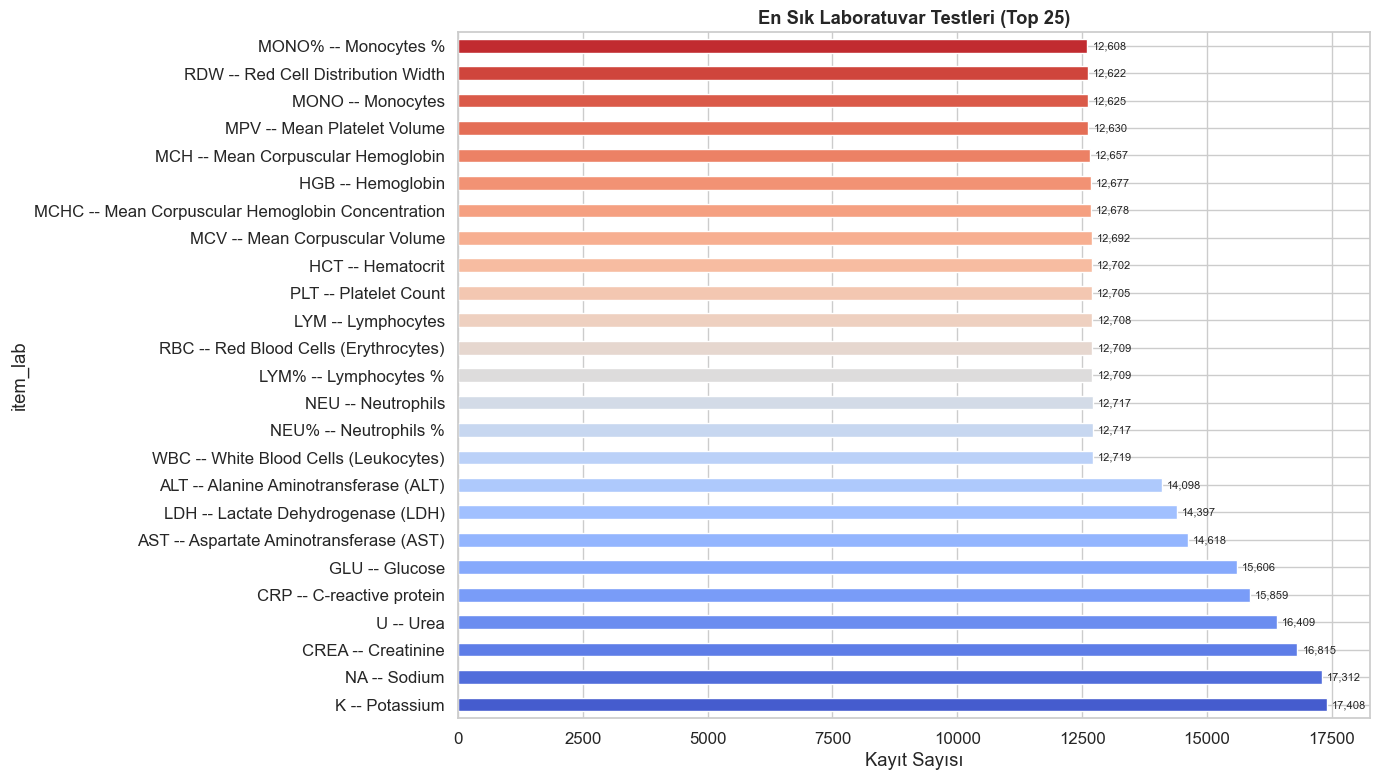

In [27]:
# En sık lab testleri
lab_counts = df_lab['item_lab'].value_counts()
print(f'Toplam benzersiz test türü: {len(lab_counts)}')

fig, ax = plt.subplots(figsize=(14, 8))
top_labs = lab_counts.head(25)
top_labs.plot(kind='barh', ax=ax, color=sns.color_palette('coolwarm', len(top_labs)))
ax.set_title('En Sık Laboratuvar Testleri (Top 25)', fontweight='bold')
ax.set_xlabel('Kayıt Sayısı')
for i, v in enumerate(top_labs.values):
    ax.text(v + 100, i, f'{v:,}', va='center', fontsize=8)
plt.tight_layout()
plt.show()

In [28]:
# val_result dağılımı (sayısal lab sonuçları)
print('=== Lab val_result İstatistikleri ===')
print(f'Non-null: {df_lab["val_result"].notna().sum():,}')
print(f'Null: {df_lab["val_result"].isna().sum():,}')
print(f'\nİstatistikler:')
print(df_lab['val_result'].describe())

# result_text dolu mu?
print(f'\nresult_text non-null: {df_lab["result_text"].notna().sum():,}')
if df_lab['result_text'].notna().sum() > 0:
    print(f'En sık result_text:')
    print(df_lab['result_text'].value_counts().head(10))

=== Lab val_result İstatistikleri ===
Non-null: 764,969
Null: 22,015

İstatistikler:
count     764969
unique     20129
top          0.0
freq       11855
Name: val_result, dtype: object

result_text non-null: 20,369
En sık result_text:
result_text
Negative                 3219
Detected                 3181
Not detected             2870
IMMATURE GRANULOCYTES    1193
Normal                    931
BLASTS                    544
No sample submitted       399
Hemolyzed sample          349
Negative (< 2.0)          322
Negative (0.04)           285
Name: count, dtype: int64


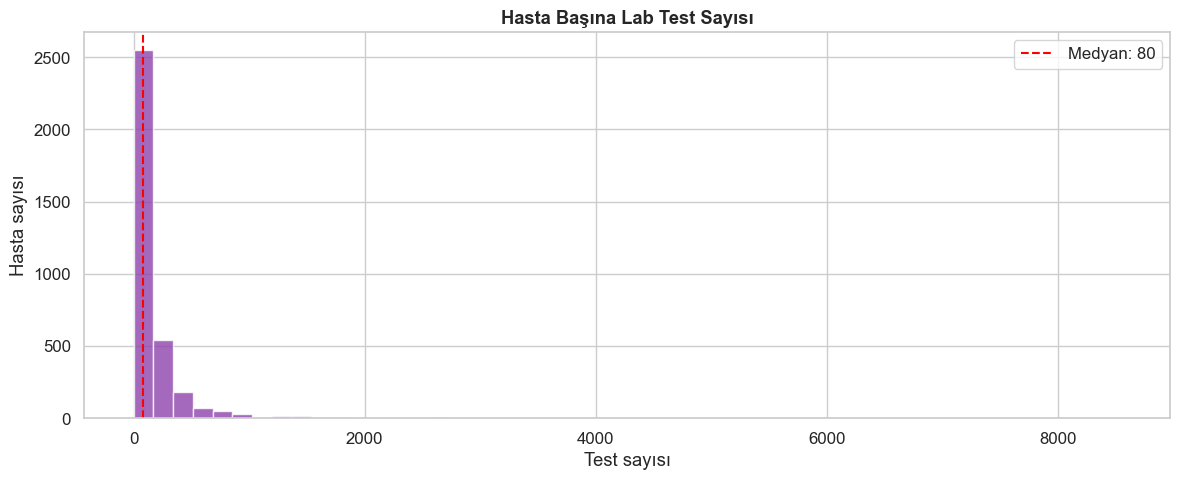

In [29]:
# Hasta başına lab test sayısı
lab_per_patient = df_lab.groupby('patient_id').size()

fig, ax = plt.subplots(figsize=(12, 5))
lab_per_patient.hist(bins=50, ax=ax, color='#8e44ad', edgecolor='white', alpha=0.8)
ax.axvline(lab_per_patient.median(), color='red', linestyle='--',
           label=f'Medyan: {lab_per_patient.median():.0f}')
ax.set_title('Hasta Başına Lab Test Sayısı', fontweight='bold')
ax.set_xlabel('Test sayısı')
ax.set_ylabel('Hasta sayısı')
ax.legend()
plt.tight_layout()
plt.show()

---
## 6. Medication Tablosu

In [30]:
df_med = dfs['medication']
print(f'Shape: {df_med.shape}')
print(f'Sütunlar: {list(df_med.columns)}')
print(f'Benzersiz hasta: {df_med["patient_id"].nunique()}')
print(f'Hasta başına ortalama ilaç: {df_med.shape[0] / df_med["patient_id"].nunique():.1f}')
display(df_med.head())

Shape: (115649, 8)
Sütunlar: ['medication_id', 'patient_id', 'drug_comercial_name', 'id_atc5', 'id_atc7', 'daily_avrg_dose', 'drug_start_date', 'drug_end_date']
Benzersiz hasta: 4449
Hasta başına ortalama ilaç: 26.0


,medication_id,patient_id,drug_comercial_name,id_atc5,id_atc7,daily_avrg_dose,drug_start_date,drug_end_date
0,1,10030053,LEVOTIROXINA comp 50 mcg,H03AA,H03AA01,1,2191-10-16 00:00:00,2191-10-26 00:00:00
1,2,10030053,SUERO ClNa 100 mL I.V.,B05BB,B05BB01,4,2191-10-12 00:00:00,2191-10-16 00:00:00
2,3,10030053,EPINITRIL parche 10 mg,C01DA,C01DA02,1,2191-10-13 00:00:00,2191-10-26 00:00:00
3,4,10030053,ATORVASTATINA comp 20 mg,C10AA,C10AA05,4,2191-10-12 00:00:00,2191-10-26 00:00:00
4,5,10030053,ATROALDO aerosol 20 mcg/inh 200 dosis,R03BB,R03BB01,1,2191-10-23 00:00:00,2191-10-23 00:00:00


Toplam benzersiz ilaç: 1165


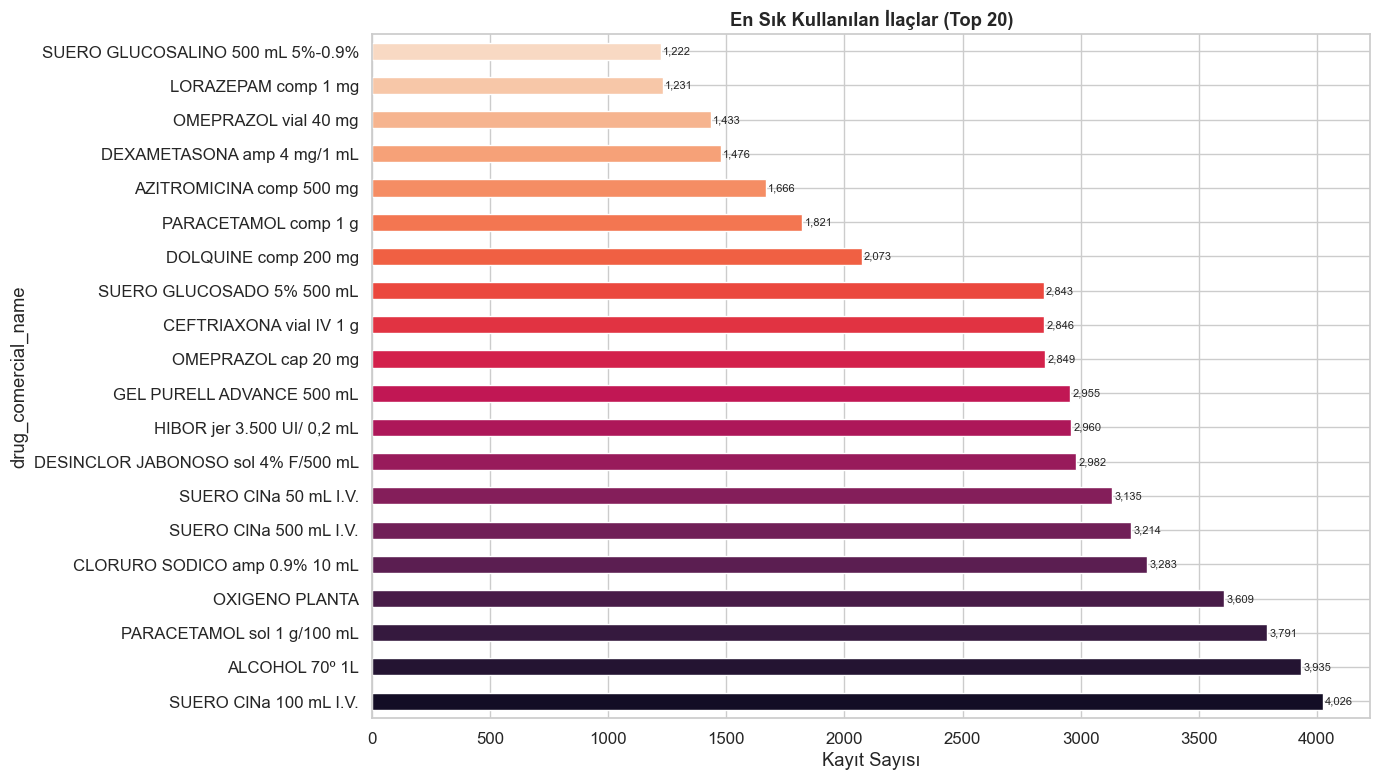

In [31]:
# En sık ilaçlar
med_counts = df_med['drug_comercial_name'].value_counts()
print(f'Toplam benzersiz ilaç: {len(med_counts)}')

fig, ax = plt.subplots(figsize=(14, 8))
top_meds = med_counts.head(20)
top_meds.plot(kind='barh', ax=ax, color=sns.color_palette('rocket', len(top_meds)))
ax.set_title('En Sık Kullanılan İlaçlar (Top 20)', fontweight='bold')
ax.set_xlabel('Kayıt Sayısı')
for i, v in enumerate(top_meds.values):
    ax.text(v + 10, i, f'{v:,}', va='center', fontsize=8)
plt.tight_layout()
plt.show()

In [32]:
# ATC-5 sınıflandırma
df_atc5 = dfs['atc5']
print(f'ATC-5 sınıf sayısı: {len(df_atc5)}')
display(df_atc5.head(10))

# En sık ATC-5 sınıfları
atc5_usage = df_med['id_atc5'].value_counts().head(15)
atc5_merged = atc5_usage.reset_index()
atc5_merged.columns = ['id_atc5', 'count']
atc5_merged = atc5_merged.merge(df_atc5, on='id_atc5', how='left')
print('\n=== En Sık ATC-5 İlaç Sınıfları ===')
display(atc5_merged)

ATC-5 sınıf sayısı: 323


,id_atc5,atc5_name
0,H03AA,HORMONAS TIROIDEASS
1,B05BB,SOLUCIONES QUE AFECTAN EL BALANCE ELECTROLÍTICO
2,C01DA,NITRATOS ORGÁNICOS
3,C10AA,INHIBIDORES DE LA HMG COA REDUCTASA
4,R03BB,ANTICOLINÉRGICOS
5,B05BA,SOLUCIONES PARA NUTRICIÓN PARENTERAL
6,H02AB,GLUCOCORTICOIDES
7,A02BC,INHIBIDORES DE LA BOMBA DE PROTONES
8,B01AC,"INHIBIDORES DE LA AGREGACIÓN PLAQUETARIA, EXCL..."
9,J01MA,FLUOROQUINOLONAS



=== En Sık ATC-5 İlaç Sınıfları ===


,id_atc5,count,atc5_name
0,B05BB,14260,SOLUCIONES QUE AFECTAN EL BALANCE ELECTROLÍTICO
1,D08AX,8542,OTROS ANTISÉPTICOS Y DESINFECTANTES
2,N02BE,6448,ANILIDAS
3,B01AB,5562,GRUPO DE LA HEPARINA
4,B05XA,5252,SOLUCIONES ELECTROLÍTICAS
5,H02AB,4852,GLUCOCORTICOIDES
6,D08AC,4726,BIGUANIDAS Y AMIDINAS
7,A02BC,4577,INHIBIDORES DE LA BOMBA DE PROTONES
8,V03AN,4096,GASES MEDICINALES
9,B05BA,4053,SOLUCIONES PARA NUTRICIÓN PARENTERAL


---
## 7. DICOM Metadata (Görüntü Bilgisi)

In [33]:
df_dicom = dfs['dicom_metadata']
print(f'Shape: {df_dicom.shape}')
print(f'Sütunlar: {list(df_dicom.columns)}')
display(df_dicom.head())

Shape: (1444764, 15)
Sütunlar: ['patient_group_folder_id', 'patient_id', 'patient_folder_id', 'study_id', 'image_id', 'StudyDate', 'StudyTime', 'Modality', 'StudyDescription', 'BodyPart', 'CodeValue', 'CodeMeaning', 'ViewPosition', 'PatientPosition', 'SpatialResolution']


,patient_group_folder_id,patient_id,patient_folder_id,study_id,image_id,StudyDate,StudyTime,Modality,StudyDescription,BodyPart,CodeValue,CodeMeaning,ViewPosition,PatientPosition,SpatialResolution
0,p10,10030053,p10030053,s75704956,75704956_0001,2191-10-16,15:10:26,DX,Radiograph Chest,Thorax/Chest,NaN,NaN,PA,Unknown,Unknown
1,p10,10030053,p10030053,s75704956,75704956_0002,2191-10-16,15:10:26,DX,Radiograph Chest,Thorax/Chest,NaN,NaN,LL,Unknown,Unknown
2,p10,10030053,p10030053,s74860584,74860584_0001,2191-10-17,08:54:15,CT,CT Chest with contrast,Thorax/Chest,A_372,CT Chest with contrast,Unknown,HFS,Unknown
3,p10,10030053,p10030053,s74860584,74860584_0002,2191-10-17,08:54:15,CT,CT Chest with contrast,Thorax/Chest,A_372,CT Chest with contrast,Unknown,HFS,Unknown
4,p10,10030053,p10030053,s74860584,74860584_0003,2191-10-17,08:54:15,CT,CT Chest with contrast,Thorax/Chest,A_372,CT Chest with contrast,Unknown,HFS,Unknown


Benzersiz hasta: 1859
Benzersiz study: 5123
Benzersiz image: 1444764

=== Modality Dağılımı ===
Modality
CT    1440156
CR       3197
DX       1411
Name: count, dtype: int64


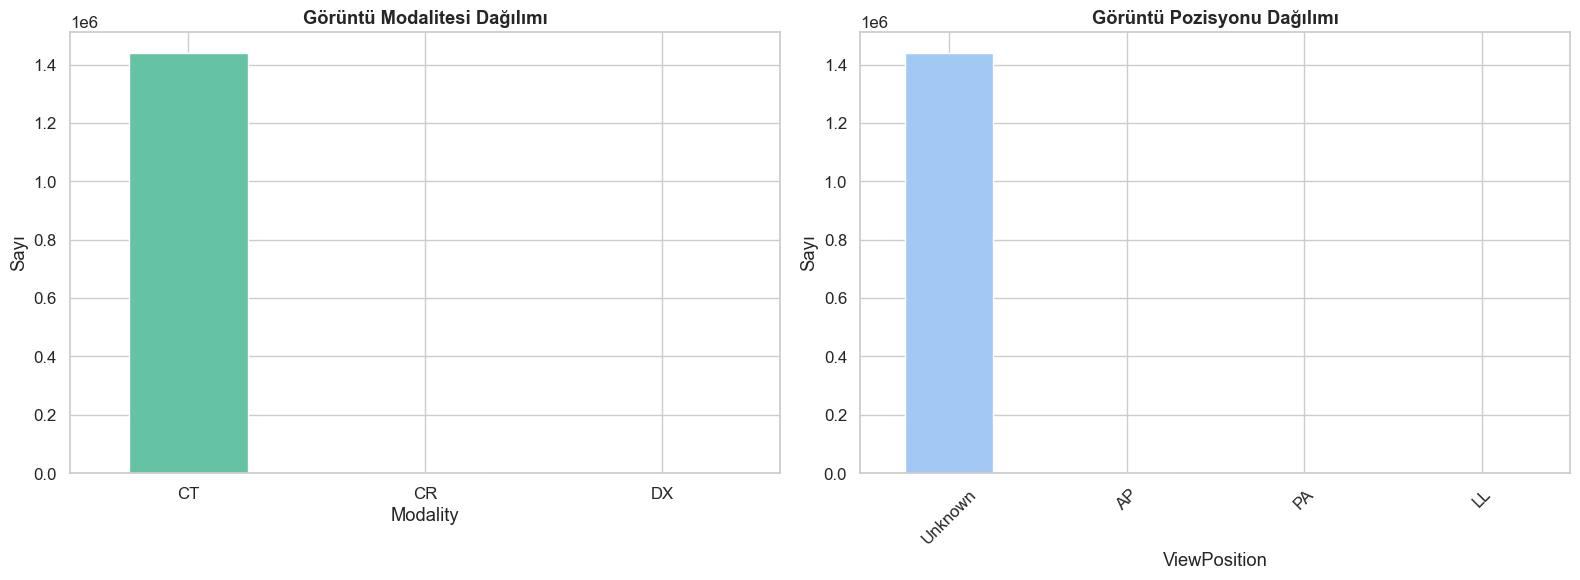

In [34]:
print(f'Benzersiz hasta: {df_dicom["patient_id"].nunique()}')
print(f'Benzersiz study: {df_dicom["study_id"].nunique()}')
print(f'Benzersiz image: {df_dicom["image_id"].nunique()}')

# Modality dağılımı
print('\n=== Modality Dağılımı ===')
mod_counts = df_dicom['Modality'].value_counts()
print(mod_counts)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Modality
ax = axes[0]
mod_counts.plot(kind='bar', ax=ax, color=sns.color_palette('Set2', len(mod_counts)))
ax.set_title('Görüntü Modalitesi Dağılımı', fontweight='bold')
ax.set_ylabel('Sayı')
ax.tick_params(axis='x', rotation=0)

# ViewPosition
ax = axes[1]
view_counts = df_dicom['ViewPosition'].value_counts().head(10)
view_counts.plot(kind='bar', ax=ax, color=sns.color_palette('pastel', len(view_counts)))
ax.set_title('Görüntü Pozisyonu Dağılımı', fontweight='bold')
ax.set_ylabel('Sayı')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [35]:
# Sadece DX (X-ray) görüntüleri
df_xray = df_dicom[df_dicom['Modality'] == 'DX']
print(f'X-ray görüntü sayısı: {len(df_xray):,}')
print(f'X-ray benzersiz hasta: {df_xray["patient_id"].nunique()}')
print(f'X-ray benzersiz study: {df_xray["study_id"].nunique()}')

# Hasta başına X-ray sayısı
xray_per_patient = df_xray.groupby('patient_id').size()
print(f'\nHasta başına X-ray: min={xray_per_patient.min()}, max={xray_per_patient.max()}, '
      f'medyan={xray_per_patient.median():.0f}, ortalama={xray_per_patient.mean():.1f}')

X-ray görüntü sayısı: 1,411
X-ray benzersiz hasta: 488
X-ray benzersiz study: 1179

Hasta başına X-ray: min=1, max=20, medyan=2, ortalama=2.9


---
## 8. Cross-Table Analiz: Hasta ID Matching

In [36]:
# Her tablodaki benzersiz hasta sayıları ve kesişimleri
patient_ids = {
    'patient':     set(dfs['patient']['patient_id'].unique()),
    'diag_er':     set(dfs['diag_er']['patient_id'].unique()),
    'diag_hosp':   set(dfs['diag_hosp']['patient_id'].unique()),
    'vital_signs': set(dfs['vital_signs']['patient_id'].unique()),
    'medication':  set(dfs['medication']['patient_id'].unique()),
    'lab':         set(dfs['lab']['patient_id'].unique()),
    'dicom':       set(dfs['dicom_metadata']['patient_id'].unique()),
}

print('=== Her Tablodaki Benzersiz Hasta Sayısı ===')
for name, ids in patient_ids.items():
    print(f'{name:15s}: {len(ids):,}')

# Patient tablosu ile kesişimler
print('\n=== Patient Tablosu ile Kesişim ===')
base = patient_ids['patient']
for name, ids in patient_ids.items():
    if name == 'patient':
        continue
    overlap = base & ids
    only_other = ids - base
    only_patient = base - ids
    print(f'{name:15s}: kesişim={len(overlap):,}  |  '
          f'sadece_{name}={len(only_other):,}  |  '
          f'sadece_patient={len(only_patient):,}')

=== Her Tablodaki Benzersiz Hasta Sayısı ===
patient        : 4,479
diag_er        : 4,197
diag_hosp      : 4,427
vital_signs    : 4,377
medication     : 4,449
lab            : 3,540
dicom          : 1,859

=== Patient Tablosu ile Kesişim ===
diag_er        : kesişim=4,197  |  sadece_diag_er=0  |  sadece_patient=282
diag_hosp      : kesişim=4,427  |  sadece_diag_hosp=0  |  sadece_patient=52
vital_signs    : kesişim=4,377  |  sadece_vital_signs=0  |  sadece_patient=102
medication     : kesişim=4,449  |  sadece_medication=0  |  sadece_patient=30
lab            : kesişim=3,540  |  sadece_lab=0  |  sadece_patient=939
dicom          : kesişim=1,859  |  sadece_dicom=0  |  sadece_patient=2,620


In [37]:
# Tüm tablolarda ortak olan hastalar
common_all = base
for name, ids in patient_ids.items():
    common_all = common_all & ids

print(f'Tüm tablolarda ortak hasta: {len(common_all):,}')
print(f'Patient tablosu toplam: {len(base):,}')
print(f'Oran: {len(common_all)/len(base)*100:.1f}%')

# X-ray'i olan hasta sayısı
xray_patients = set(df_dicom[df_dicom['Modality'] == 'DX']['patient_id'].unique())
xray_in_patient = base & xray_patients
print(f'\nX-ray verisi olan hasta (patient tablosunda): {len(xray_in_patient):,} / {len(base):,}')

Tüm tablolarda ortak hasta: 1,548
Patient tablosu toplam: 4,479
Oran: 34.6%

X-ray verisi olan hasta (patient tablosunda): 488 / 4,479


---
## 9. Özet: Tüm Tabloların Sütun Yapıları

Aşağıdaki tablo, her CSV dosyasındaki sütunları, veri tiplerini ve eksik oranlarını özetler.

In [38]:
# Tüm CSV'ler için özet tablo
summary_rows = []
for name, df in dfs.items():
    for col in df.columns:
        null_pct = df[col].isnull().mean() * 100
        nunique = df[col].nunique()
        dtype = str(df[col].dtype)
        sample = str(df[col].dropna().iloc[0]) if df[col].notna().any() else 'N/A'
        if len(sample) > 40:
            sample = sample[:37] + '...'
        summary_rows.append({
            'Tablo': name,
            'Sütun': col,
            'Dtype': dtype,
            'Null%': round(null_pct, 1),
            'Unique': nunique,
            'Örnek': sample
        })

df_summary = pd.DataFrame(summary_rows)
print(f'Toplam {len(df_summary)} sütun × {df_summary["Tablo"].nunique()} tablo')
display(df_summary)

Toplam 167 sütun × 9 tablo


,Tablo,Sütun,Dtype,Null%,Unique,Örnek
0,patient,patient_id,int64,0.0,4479,10030053
1,patient,age,int64,0.0,99,83
2,patient,sex,str,0.0,2,FEMALE
3,patient,diag_inpat,str,0.0,2,COVID CONFIRMED
4,patient,admission_d_inpat,str,0.0,4201,2191-10-11 00:00:00
...,...,...,...,...,...,...
162,dicom_metadata,CodeValue,str,19.9,13,A_372
163,dicom_metadata,CodeMeaning,str,19.9,12,CT Chest with contrast
164,dicom_metadata,ViewPosition,str,0.1,4,PA
165,dicom_metadata,PatientPosition,str,0.0,4,Unknown
